In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

## Create a random distribution of number

In [ ]:
np.random.random(10)

In [ ]:
np.random.rand(10)

In [ ]:
np.random.randint(10)

In [ ]:
np.random.normal(10, 1, 10)

In [ ]:
def create_numbers(mean=54 , SD=15, num_samples = 100, seed=42):
    np.random.seed(seed)
    
    sample_number = np.random.normal(loc = mean, scale = SD, size = num_samples)   # create a normal distribution
    sample_number = np.round(sample_number, decimals= 0)
    
    return sample_number

In [ ]:
sample = create_numbers()
sample

In [76]:
from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
style.available

In [ ]:
sns.distplot(sample,bins =20)

In [ ]:
sns.boxplot(sample)

In [ ]:
ser = pd.Series(sample)
ser

In [ ]:
ser.describe()

In [ ]:
IQR = 60.250000 - 45.000000
lower_limit  = 45 - 1.5*IQR
lower_limit

In [ ]:
upper_limit = 60.25 + 1.5*IQR 
upper_limit

In [ ]:
ser[(ser>lower_limit) & (ser<upper_limit) ]

In [ ]:
q75, q25 = np.percentile(sample, [75,25])

In [ ]:
q75

In [ ]:
q25

In [ ]:
IQR = q75 - q25
IQR

In [77]:
with open('D:\Python\ML Live\Modular1\ML_Live-\data\Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [78]:
df = pd.read_csv('D:\Python\ML Live\Modular1\ML_Live-\data\Ames_Housing_Data.csv')
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03


In [80]:
df.corr()['SalePrice'].sort_values

<bound method Series.sort_values of PID               -0.246521
MS SubClass       -0.085092
Lot Frontage       0.357318
Lot Area           0.266549
Overall Qual       0.799262
Overall Cond      -0.101697
Year Built         0.558426
Year Remod/Add     0.532974
Mas Vnr Area       0.508285
BsmtFin SF 1       0.432914
BsmtFin SF 2       0.005891
Bsmt Unf SF        0.182855
Total Bsmt SF      0.632280
1st Flr SF         0.621676
2nd Flr SF         0.269373
Low Qual Fin SF   -0.037660
Gr Liv Area        0.706780
Bsmt Full Bath     0.276050
Bsmt Half Bath    -0.035835
Full Bath          0.545604
Half Bath          0.285056
Bedroom AbvGr      0.143913
Kitchen AbvGr     -0.119814
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.526965
Garage Cars        0.647877
Garage Area        0.640401
Wood Deck SF       0.327143
Open Porch SF      0.312951
Enclosed Porch    -0.128787
3Ssn Porch         0.032225
Screen Porch       0.112151
Pool Area          0.068403
Misc Val    

In [82]:
df.nunique()

PID               2930
MS SubClass         16
MS Zoning            7
Lot Frontage       128
Lot Area          1960
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice         1032
Length: 81, dtype: int64

In [ ]:
df_numerical  = df[]

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

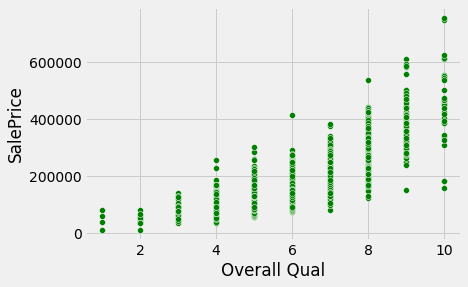

In [81]:
sns.scatterplot(x = 'Overall Qual' , y= 'SalePrice', data=df , color = 'green')

In [ ]:
sns.scatterplot(x= 'Gr Liv Area', y= 'SalePrice', data=df, color='green' )

In [ ]:
df.corr()

### getting the outliers


In [ ]:
px.scatter(df,x = 'Overall Qual' , y= 'SalePrice').show()

In [ ]:
outlier1 = df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]
outlier1

### remove outlier

In [ ]:
df = df.drop(outlier1.index)


In [ ]:
px.scatter(df,x = 'Overall Qual' , y= 'SalePrice').show()

### removing the next outlier

In [ ]:
px.scatter(df, x= 'Gr Liv Area', y= 'SalePrice',).show()

In [ ]:
outlier2 = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)]
outlier2

In [ ]:
df = df.drop(outlier2.index)

In [ ]:
# another way to delete outliers
df.drop(df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)].index) 

In [ ]:
df.to_csv('D:\Python\ML Live\Modular1\ML_Live-\data\Ames_outliers_removed.csv')

In [ ]:
df = pd.read_csv('D:\Python\ML Live\Modular1\ML_Live-\data\Ames_outliers_removed.csv', index_col=0)
df

### display what is missing

In [ ]:
df.info()

### remove useless column

In [ ]:
df = df.drop('PID', axis = 1)

In [ ]:
df

In [ ]:
df.isnull()

In [ ]:
len(df)

In [ ]:
df.isnull().sum()

In [ ]:

((df.isnull().sum()/len(df))*100).sort_index()

In [ ]:
def percent_missing(df):
    percent_nan = (df.isnull().sum()/len(df))*100
    percent_nan = percent_nan[percent_nan>0].sort_values()  # percentage missing is more than 0%
    
    return percent_nan

In [ ]:
percent_nan=percent_missing(df).sort_values()
percent_nan

In [ ]:
plt.figure(figsize=(8,3), dpi =200)
sns.barplot(x = percent_nan.index, y =percent_nan)
plt.xticks(rotation=90)

In [ ]:
df[df['Electrical'].isnull()]   # shows all row in Electrical which doesnt have data

In [ ]:
df[df['Lot Frontage'].isnull()]

In [ ]:
df = df.dropna(axis = 0, subset=['Electrical','Garage Cars'])

In [ ]:
plt.figure(figsize=(8,3), dpi =200)
sns.barplot(x = percent_nan.index, y =percent_nan, palette ='plasma')
plt.xticks(rotation=90)
plt.ylim(0,1)    #for visualizin from 0% - 1% data

In [ ]:
px.bar(x = percent_nan.index, y =percent_nan, text_auto=True).show()

# Filling Features according to the data

In [ ]:
# BSMT Numeric Columns - fillna "0"
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF','Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0) #0 Imputation

#BSMT Ctegorical Columns - fill "None"
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None') #None Imputation


In [ ]:
df[df['Bsmt Full Bath'].isnull()]

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.barplot(x=percent_nan.index, y= percent_nan, palette='viridis')
plt.xticks(rotation=90)
plt.ylim(0,1) #for visulaizing 1% data

In [ ]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna("None")     #categorical feature

In [ ]:
df["Mas Vnr Area"] = df['Mas Vnr Area'].fillna("0")        #numerical feature

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.barplot(x=percent_nan.index, y= percent_nan, palette='viridis')
plt.xticks(rotation=90)
plt.ylim(0,1) #for visulaizing 1% data

In [ ]:
px.bar(x = percent_nan.index, y =percent_nan, text_auto=True).show()

In [ ]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna("None")     # fill None for all houses that doesnt have garage

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
plt.figure(figsize=(5,3), dpi=200)
sns.barplot(x=percent_nan.index, y= percent_nan, palette='viridis')
plt.xticks(rotation=90)

In [ ]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
px.bar( x=percent_nan.index, y= percent_nan, text_auto= True).show()

In [ ]:
df = df.drop(['Pool QC', 'Fence', 'Alley','Misc Feature'], axis=1)    # removed columns BC almost every row is empty

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
px.bar( x=percent_nan.index, y= percent_nan, text_auto= True).show()

In [ ]:
df['Fireplace Qu'].value_counts

In [ ]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
px.bar(x=percent_nan.index , y=percent_nan, text_auto=True).show()

In [ ]:
px.box(df, x = 'Lot Frontage', y = 'Neighborhood', points='all' ).show()


In [ ]:
df['Lot Frontage']

In [ ]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

In [ ]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [ ]:
df.isnull().sum()

In [ ]:
percent_nan = percent_missing(df)

In [ ]:
px.bar(x=percent_nan.index, y=percent_nan, text_auto=True).show()

In [ ]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [ ]:
percent_nan = percent_missing(df) #percentage of missing 

In [ ]:

px.bar(x=percent_nan.index, y=percent_nan, text_auto=True).show()
    

In [ ]:
# Outlier END